In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
# Extracting Columns having <5% missing values
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols


['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
# df[cols].sample(5)
print(df[cols].shape)

(19158, 5)


In [7]:
new_df = df[cols].dropna()
new_df.shape

(17182, 5)

## Effect of CCA on distribution of the data (Numeric Features)

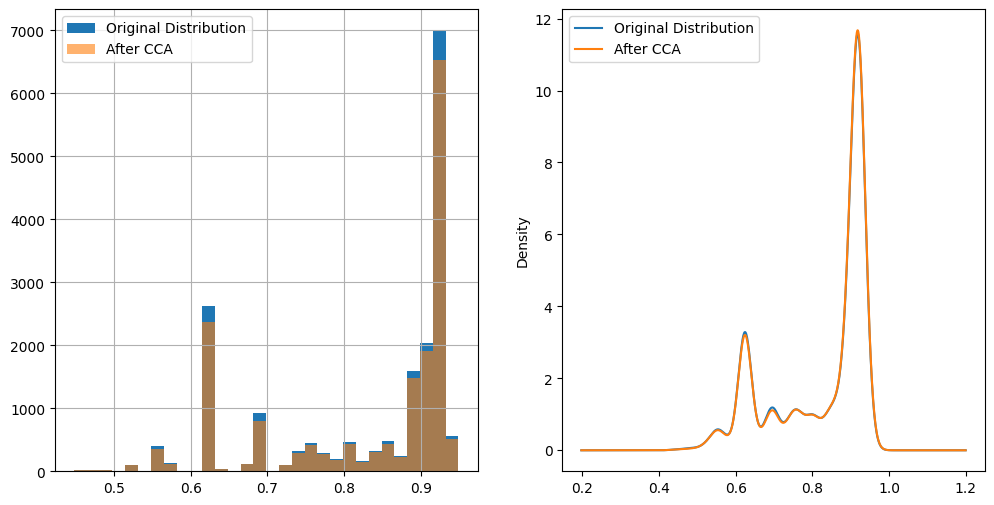

In [8]:
fig_horizontal, (ax1_h, ax2_h) = plt.subplots(1, 2, figsize=(12, 6))

# Original distribution
df['city_development_index'].hist(bins=30, label='Original Distribution', ax=ax1_h)
df['city_development_index'].plot.density(label='Original Distribution', ax=ax2_h)

# Distribution after removing the missing values
new_df['city_development_index'].hist(bins=30, label='After CCA', ax=ax1_h, alpha=0.6)
new_df['city_development_index'].plot.density(label='After CCA', ax=ax2_h)


ax1_h.legend()
ax2_h.legend()
plt.show()

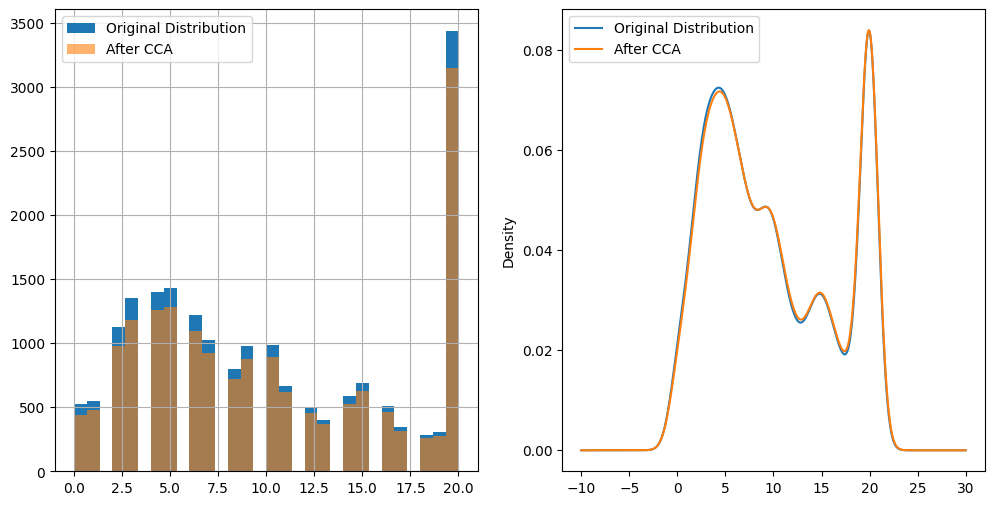

In [9]:
fig_horizontal, (ax1_h, ax2_h) = plt.subplots(1, 2, figsize=(12, 6))

# Original distribution
df['experience'].hist(bins=30, label='Original Distribution', ax=ax1_h)
df['experience'].plot.density(label='Original Distribution', ax=ax2_h)

# Distribution after removing the missing values
new_df['experience'].hist(bins=30, label='After CCA', ax=ax1_h, alpha=0.6)
new_df['experience'].plot.density(label='After CCA', ax=ax2_h)


ax1_h.legend()
ax2_h.legend()
plt.show()

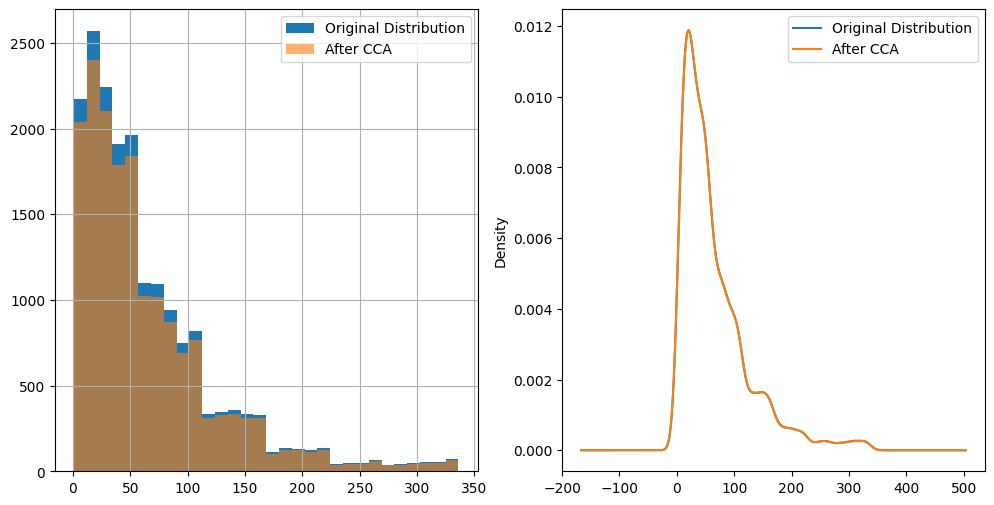

In [10]:
fig_horizontal, (ax1_h, ax2_h) = plt.subplots(1, 2, figsize=(12, 6))

# Original distribution
df['training_hours'].hist(bins=30, label='Original Distribution', ax=ax1_h)
df['training_hours'].plot.density(label='Original Distribution', ax=ax2_h)

# Distribution after removing the missing values
new_df['training_hours'].hist(bins=30, label='After CCA', ax=ax1_h, alpha=0.6)
new_df['training_hours'].plot.density(label='After CCA', ax=ax2_h)


ax1_h.legend()
ax2_h.legend()
plt.show()

No change in the distributions after CCA.

## Effect of CCA on Categorical Features (Check Ratio Before and After)

In [11]:
temp = pd.concat([
            # Percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # Percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# Add column names
temp.columns = ['Original Ratio of Each Category', 'After CCA']

temp

,Original Ratio of Each Category,After CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [12]:
temp = pd.concat([
            # Percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # Percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# Add column names
temp.columns = ['Original Ratio of Each Category', 'After CCA']

temp

,Original Ratio of Each Category,After CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


Acceptable change in ratios after CCA.